Importanto bibliotecas necessárias

In [374]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Introdução


**Contextualização**


**Tema e Objetivo**


**Base de Dados**


# Manipulando as planilhas de dados

In [375]:
dados_aguafiltrada0 =  pd.read_excel('planilhas/Água_Filtrada_por_município.xlsx')
dados_popmunicipio0 =  pd.read_excel('planilhas/População_Residente_por_Múnicipio.xlsx')
dados_pib0 = pd.read_excel('planilhas/Pib_per_capita_por_municipio.xlsx')
dados_idososcasas0 = pd.read_excel('planilhas/Porcentagem_de_Idosos_nas_Casas.xlsx')
# dados_lixo0 = pd.read_excel('planilhas/Lixo_Municipio.xlsx')
dados_desemprego0 = pd.read_excel('planilhas/Taxa_de_desemprego.xlsx')
dados_analfabetismo0 = pd.read_excel('planilhas/Taxa_de_anafalbetismo.xlsx')
dados_coberturavacinal0 = pd.read_excel('planilhas/Cobertura_vacinal.xlsx')
dados_cobequipessaudebasica0 = pd.read_excel('planilhas/Cobertua_equipe_ atenção_básica_por_Município.xlsx')
dados_pessoasbaixarenda0 = pd.read_excel('planilhas/Porcentagem_de_Pessoas_Baixa_Renda.xlsx')
# dados_escolariedade0 = pd.read_excel('planilhas/Escolariedade.xlsx')
dados_idadepopulacional0 = pd.read_excel('planilhas/Idade_população.xlsx')
dados_tuberculose0 = pd.read_excel('planilhas/Tuberculose.xlsx')
dados_diabetes0= pd.read_excel('planilhas/Tuberculosos_com_diabetes.xlsx')
dados_tuber_vacinacao0 = pd.read_excel('planilhas/tuberculose vacinacao.xlsx')
dados_ppl0 = pd.read_excel('planilhas/tuberculose_em_ppl.xlsx')
dados_letalidade0 = pd.read_excel('planilhas/tuberculose_letalidade.xlsx')
dados_poprua0 = pd.read_excel('planilhas/tuberculose_pop_sit_rua.xlsx')
dados_alcolismo0 = pd.read_excel('planilhas/tuberculosos e alcolismo.xlsx')
dados_tabagismo0 = pd.read_excel('planilhas/tuberculosos e tabagismo.xlsx')
dados_outrasdoencas0 = pd.read_excel('planilhas/tuberculosos_com_outras_doenças.xlsx')


### Limpando as planilhas de dados

In [376]:
#Função de limpeza
#Função que separa o código do nome do município
def separa_codigo(planilha):
    colunas = list(planilha)
    if "Município" in colunas:
        planilha[['Código do Município', 'Nome do Município']] = planilha['Município'].str.split(' ', n=1, expand=True)
        plan = planilha.drop('Município', axis=1)
        planilha_limpa = plan.drop('Nome do Município', axis=1)
    else: 
        planilha_limpa = planilha
    return planilha_limpa

#função que remove as informações redundantes sobre turberculose
#remove os dados ignorados e os dados com não, pois só me interessa sim e total
def remove_colunas_desnecessarias(planilha):
    colunas = list(planilha)
    if "Ign/Branco" in colunas:
        planilha.drop(labels=["Ign/Branco"], axis=1)
    if "Não" in colunas: 
        planilha.drop(labels=["Não"], axis=1)
    if "Total" in colunas: 
        planilha.drop(labels=["Total"], axis=1)
    return planilha


#função de limpeza que substitui valores nulos (dados por -) por zero
def exclui_valor_hifen(planilha):
    return planilha.replace('-', '0')

- Limpando dados do DataSus

In [377]:
#Limpa linhas inúteis
df_aguafiltrada = dados_aguafiltrada0.drop(dados_aguafiltrada0.index[-2:])
df_popmunicipio = dados_popmunicipio0.drop(dados_popmunicipio0.index[-4:])
df_pib = dados_pib0.drop(dados_pib0.index[-11:])
df_idososcasas= dados_idososcasas0.drop(dados_idososcasas0.index[-4:])
# df_lixo1 = dados_lixo0.drop(dados_lixo0.index[-2:])
# df_lixo = df_lixo1.drop(labels=['Outro destino', 'Total'], axis=1)
df_desemprego = dados_desemprego0.drop(dados_desemprego0.index[-8:])
df_analfabetismo = dados_analfabetismo0.drop(dados_analfabetismo0.index[-4:])
df_coberturavacinal = dados_coberturavacinal0.drop(dados_coberturavacinal0.index[-3:])
df_cobequipessaudebasica = dados_cobequipessaudebasica0.drop(dados_cobequipessaudebasica0.index[-22:])
df_pessoasbaixarenda = dados_pessoasbaixarenda0.drop(dados_pessoasbaixarenda0.index[-10:])
# df_escolariedade = dados_escolariedade0.drop(dados_escolariedade0.index[-8:])
df_diabetes = remove_colunas_desnecessarias(dados_diabetes0)
df_ppl = remove_colunas_desnecessarias(dados_ppl0)
df_letalidade = remove_colunas_desnecessarias(dados_letalidade0)
df_poprua = remove_colunas_desnecessarias(dados_poprua0)
df_alcolismo = remove_colunas_desnecessarias(dados_alcolismo0)
df_tabagismo = remove_colunas_desnecessarias(dados_tabagismo0)
df_outrasdoencas = remove_colunas_desnecessarias(dados_outrasdoencas0)

#Separa os códios dos nomes e deixa as planilhas prontas para mergir
df_aguafiltrada[['Código do Município', 'Nome do Município']] = df_aguafiltrada['Município'].str.split(' ', n=1, expand=True)
dados_aguafiltrada = df_aguafiltrada.drop('Município', axis=1)
dados_popmunicipio = separa_codigo(df_popmunicipio)
dados_pib = separa_codigo(df_pib)
dados_idososcasas= separa_codigo(df_idososcasas)
# dados_lixo = separa_codigo(df_lixo)
dados_desemprego = separa_codigo(df_desemprego)
dados_analfabetismo = separa_codigo(df_analfabetismo)
dados_coberturavacinal = separa_codigo(df_coberturavacinal)
dados_cobequipessaudebasica = separa_codigo(df_cobequipessaudebasica)
dados_pessoasbaixarenda = separa_codigo(df_pessoasbaixarenda)
# dados_escolariedade = separa_codigo(df_escolariedade)
dados_idadepopulacional = separa_codigo(dados_idadepopulacional0)
dados_tuberculose = separa_codigo(dados_tuberculose0)
dados_diabetes = separa_codigo(df_diabetes)
dados_vacinabcg = separa_codigo(dados_tuber_vacinacao0)
dados_ppl = separa_codigo(df_ppl)
dados_letalidade = separa_codigo(df_letalidade)
dados_poprua = separa_codigo(df_poprua)
dados_alcolismo = separa_codigo(df_alcolismo)
dados_tabagismo = separa_codigo(df_tabagismo)
dados_outrasdoencas = separa_codigo(df_outrasdoencas)


In [378]:
dados_diabetes

,Ign/Branco,Diabéticos,Não,Total,Código do Município
0,1,-,3,4,110001
1,1,4,27,32,110002
2,-,-,2,2,110003
3,-,2,25,27,110004
4,-,-,3,3,110005
...,...,...,...,...,...
3675,-,-,2,2,522180
3676,2,2,15,19,522185
3677,-,-,1,1,522200
3678,2,-,-,2,522220


- Limpando dados do IBGE

In [379]:
dados_IBGE = pd.read_excel('planilhas/IDH IBGE.xlsx')
dados_SAUDE = pd.read_excel('planilhas/IBGE_2010_saude_total.xlsx')
del dados_IBGE['Código da Unidade da Federação']
del dados_IBGE['Código IBGE da Mesoregião']
del dados_IBGE['Nome da Mesoregião']
del dados_IBGE['Código IBGE da Microregião']
del dados_IBGE['IDHM 1991']
del dados_IBGE['IDHM 2000']
del dados_IBGE['Nome da Microregião']

c:\Users\gabri\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


##### **Merging das bases de dados**

In [380]:
#Mergindo as planilhas do IBGE
result = pd.merge(dados_IBGE, dados_SAUDE, how='outer', on='Código IBGE do Município')
#Renomeando a coluna com os códigos de município
result.rename(columns={'Código IBGE do Município': 'Código do Município'}, inplace=True)
result["Código do Município"] = result["Código do Município"] .astype(str)
result_1 = pd.merge(dados_pib, dados_aguafiltrada, how='outer', on='Código do Município')
result_2 = pd.merge(result_1, dados_popmunicipio, how='outer', on='Código do Município')
result_3 = pd.merge(result_2 , dados_idososcasas, how='outer', on='Código do Município')
result_4 = pd.merge(result_3, dados_analfabetismo, how='outer', on='Código do Município')
result_5 = pd.merge(result_4, dados_desemprego, how='outer', on='Código do Município')
# result_6 = pd.merge(result_5, dados_lixo, how='outer', on='Código do Município')
result_7 = pd.merge(result_5, dados_coberturavacinal, how='outer', on='Código do Município')
result_8 = pd.merge(result_7, dados_pessoasbaixarenda, how='outer', on='Código do Município')
# result_9 = pd.merge(result_8, dados_escolariedade, how='outer', on='Código do Município')
result_10 = pd.merge(result_8, dados_tuberculose, how='outer', on='Código do Município')
result_10["Código do Município"] = result_10["Código do Município"] .astype(str)
result_11 = pd.merge(result_10, result, how='outer', on='Código do Município')
result_12 = pd.merge(result_11, dados_idadepopulacional, how='outer', on='Código do Município')
result_13 = pd.merge(result_12, dados_diabetes, how='outer', on='Código do Município')
result_14 = pd.merge(result_13, dados_vacinabcg, how='outer', on='Código do Município')
result_15 = pd.merge(result_14, dados_ppl, how='outer', on='Código do Município')
result_16 = pd.merge(result_15, dados_letalidade, how='outer', on='Código do Município')
result_17 = pd.merge(result_16, dados_poprua, how='outer', on='Código do Município')
result_18 = pd.merge(result_17, dados_alcolismo, how='outer', on='Código do Município')
result_19 = pd.merge(result_18, dados_tabagismo, how='outer', on='Código do Município')
result_20 = pd.merge(result_19, dados_outrasdoencas, how='outer', on='Código do Município')

df = result_20

C:\Users\gabri\AppData\Local\Temp\ipykernel_13012\3976291517.py:23: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Total_x'} in the result is deprecated and will raise a MergeError in a future version.
  result_17 = pd.merge(result_16, dados_poprua, how='outer', on='Código do Município')
C:\Users\gabri\AppData\Local\Temp\ipykernel_13012\3976291517.py:24: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Ign/Branco_x', 'Não_x'} in the result is deprecated and will raise a MergeError in a future version.
  result_18 = pd.merge(result_17, dados_alcolismo, how='outer', on='Código do Município')
C:\Users\gabri\AppData\Local\Temp\ipykernel_13012\3976291517.py:25: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Total_x'} in the result is deprecated and will raise a MergeError in a future version.
  result_19 = pd.merge(result_18, dados_tabagismo, how='outer', on='Código do Município')
C:\Users\gabri\AppData\Local\Temp\ipykernel_13012\397629

In [381]:
df

,PIB_per_capita,Código do Município,Trat.Água_Filtrada,Nome do Município,População_residente,%idosos_resid_como_out_parente,Taxa_de_analfabetismo,Taxa_de_desemprego_16a_e+,Coberturas Vacinais,%_população_com_renda_,...,Não_y,Total_x,Ign/Branco_x,Tabagismo,Não_x,Total_y,Ign/Branco_y,Doenças pré-existentes,Não_y,Total
0,10725.97,110001,3573.0,ALTA FLORESTA D'OESTE,24958.0,8.5,12.0,5.01,83.802871,48.42,...,2,4.0,4,-,-,4.0,3,-,1,4.0
1,15070.14,110002,5285.0,ARIQUEMES,92448.0,11.0,7.9,4.64,75.505515,31.05,...,30,32.0,32,-,-,32.0,4,1,27,32.0
2,10968.00,110003,751.0,CABIXI,6459.0,5.3,13.8,2.49,83.333333,48.17,...,2,2.0,2,-,-,2.0,-,-,2,2.0
3,15068.72,110004,11856.0,CACOAL,80396.0,13.4,8.3,5.87,78.515834,32.10,...,27,27.0,27,-,-,27.0,-,-,27,27.0
4,13024.11,110005,1927.0,CEREJEIRAS,17424.0,11.6,10.4,5.24,88.863966,36.99,...,3,3.0,3,-,-,3.0,1,-,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,NaN,150475,NaN,NaN,15130.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5566,NaN,421265,NaN,NaN,9463.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5567,NaN,422000,NaN,NaN,11033.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5568,NaN,431454,NaN,NaN,2663.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [382]:
# result["Total de estabelecimentos de saúde"] = result["Estabelecimentos de Saúde privado total"] + result["Estabelecimentos de Saúde público total"]

##### **Bases de dados**

In [383]:
df.shape

(5570, 48)

In [384]:
df2 = df.copy()
df2.columns

Index(['PIB_per_capita', 'Código do Município', 'Trat.Água_Filtrada',
       'Nome do Município', 'População_residente',
       '%idosos_resid_como_out_parente', 'Taxa_de_analfabetismo',
       'Taxa_de_desemprego_16a_e+', 'Coberturas Vacinais',
       '%_população_com_renda_', 'Casos de Tuberculose',
       'Sigla da Unidade da Federação', 'Nome das Grandes Regiões',
       'IDHM 2010', 'Estabelecimentos de Saúde privado total',
       'Estabelecimentos de Saúde público total', 'Menor 1 ano', '1 a 4 anos',
       '60 a 69 anos', '70 a 79 anos', '80 anos e mais', 'Ign/Branco_x',
       'Diabéticos', 'Não_x', 'Total_x', 'BCG', 'Ign/Branco_y', 'PPL', 'Não_y',
       'Total_y', 'Óbito por tuberculose', 'Total_x', 'Ign/Branco_x',
       'Moradores de rua', 'Não_x', 'Total_y', 'Ign/Branco_y', 'Alcolismo',
       'Não_y', 'Total_x', 'Ign/Branco_x', 'Tabagismo', 'Não_x', 'Total_y',
       'Ign/Branco_y', 'Doenças pré-existentes', 'Não_y', 'Total'],
      dtype='object')

In [385]:
#função de limpeza que substitui valores nulos (dados por -) por zero
def exclui_valor_hifen(planilha):
    return planilha.replace('-', '0')

In [386]:
quant = ['PIB_per_capita', 'Trat.Água_Filtrada', 'População_residente', '%idosos_resid_como_out_parente', 'Taxa_de_analfabetismo','Taxa_de_desemprego_16a_e+', 'Coberturas Vacinais', '%_população_com_renda_', 'IDHM 2010','Estabelecimentos de Saúde privado total','Estabelecimentos de Saúde público total', 'Casos de Tuberculose']
var_quantitativas = df2[quant]
var_quantitativas = exclui_valor_hifen(var_quantitativas)
var_quantitativas.head()

,PIB_per_capita,Trat.Água_Filtrada,População_residente,%idosos_resid_como_out_parente,Taxa_de_analfabetismo,Taxa_de_desemprego_16a_e+,Coberturas Vacinais,%_população_com_renda_,IDHM 2010,Estabelecimentos de Saúde privado total,Estabelecimentos de Saúde público total,Casos de Tuberculose
0,10725.97,3573.0,24958.0,8.5,12.0,5.01,83.802871,48.42,0.641,4.0,7.0,4.0
1,15070.14,5285.0,92448.0,11.0,7.9,4.64,75.505515,31.05,0.702,22.0,12.0,32.0
2,10968.00,751.0,6459.0,5.3,13.8,2.49,83.333333,48.17,0.650,1.0,5.0,2.0
3,15068.72,11856.0,80396.0,13.4,8.3,5.87,78.515834,32.10,0.718,21.0,9.0,27.0
4,13024.11,1927.0,17424.0,11.6,10.4,5.24,88.863966,36.99,0.692,4.0,7.0,3.0


In [387]:
# #Transformando colunas MIXED em float (sim, eu fiz na mão porque não to sabendo pensar)
# var_quantitativas['Jogado em terreno baldio ou logradouro'] = var_quantitativas['Jogado em terreno baldio ou logradouro'].astype(float)
# var_quantitativas['Jogado em rio, lago ou mar'] = var_quantitativas['Jogado em rio, lago ou mar'].astype(float)

In [388]:
#função relativiza per capta
def relativiza(planilha):
    
    quantitativas = ['Trat.Água_Filtrada', 'Estabelecimentos de Saúde privado total',
                    'Estabelecimentos de Saúde público total','Casos de Tuberculose']

    # Substituindo as colunas pela divisão
    for coluna in quantitativas:
        planilha[coluna] = planilha[coluna] / df['População_residente']

    return planilha

var_quantitativas = relativiza(var_quantitativas)

<AxesSubplot:>

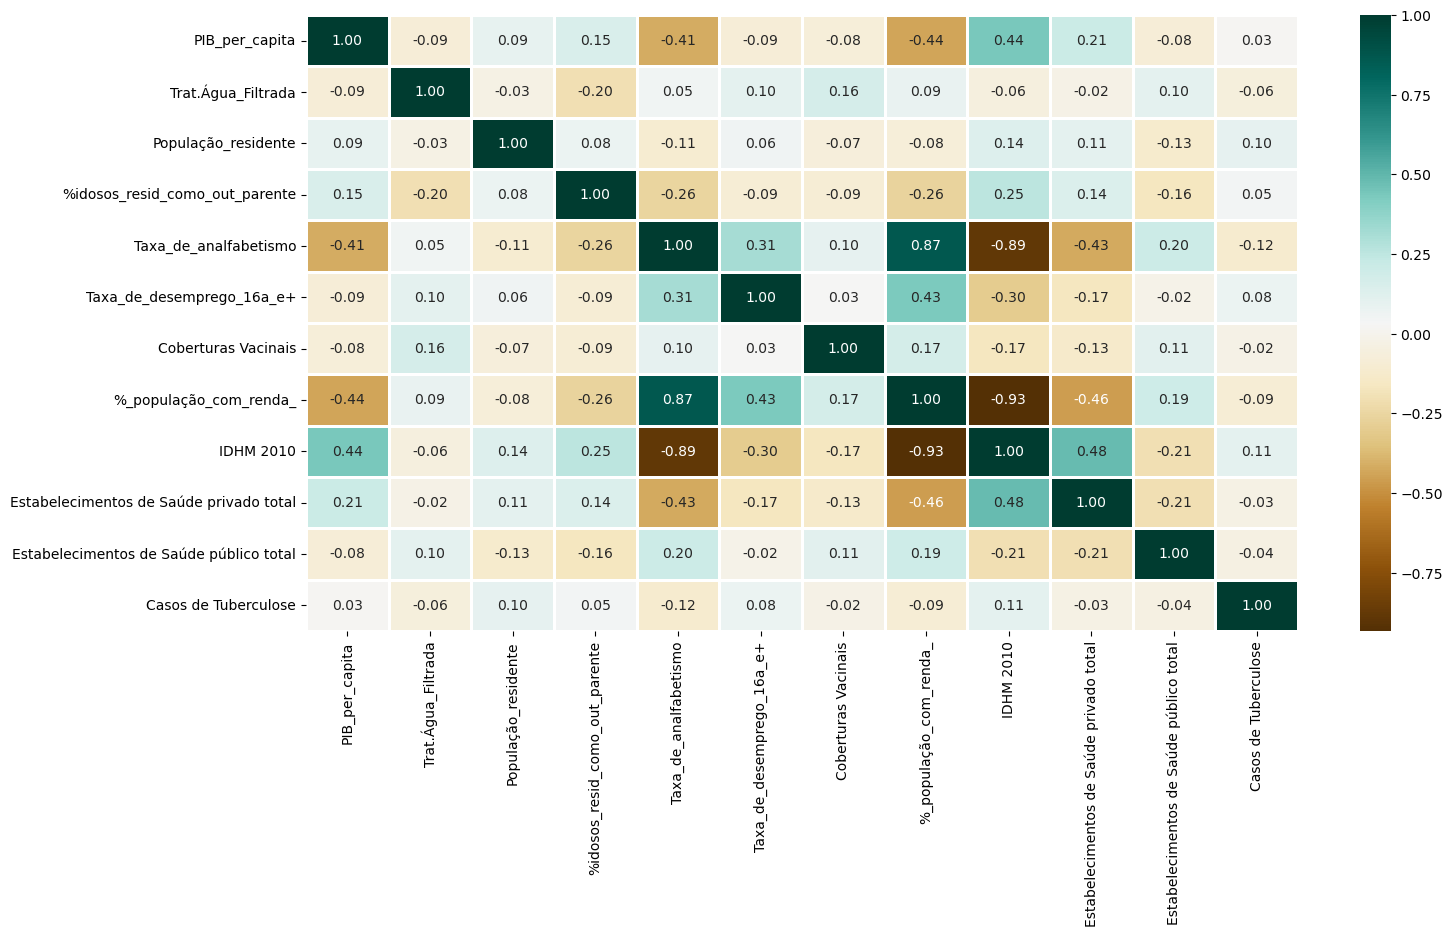

In [389]:
plt.figure(figsize=(16, 8))
sns.heatmap(var_quantitativas.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

### Dicionário:

- **Jogado em terreno baldio ou logradouro:** Número de moradores por lixo jogado em terreno baldio ou logradouro
- **Jogado em rio, lago ou mar:** Número de moradores por lixo jogado em rio, lago ou mar
- **Cobertura Vacinal** Porcentagem de Vacinas com Cobertura Adequada por município



**Estrutura do Projeto**

Serão exploradas técnicas de regressão para a previsão da variável quantitativa "Quantidade de Desistência no Curso". A qualidade da comunicação e apresentação dos resultados também será uma prioridade, assegurando que os resultados sejam compreensíveis para um público amplo.

Este projeto tem como objetivo fornecer previsões robustas e ir além de uma simples análise exploratória de dados. Espera-se que a análise e modelos desenvolvidos ajudem a entender e prever as desistências em cursos de graduação, o que pode ter implicações importantes na melhoria da Educação Superior.

### Merge dos Dados

### Data Processing

# Minerando Dados e Características do Dataset

# Modelos de Predição

# Processo e Estatísticas de Validação

# Conclusão 

# Referências Bibliográficas